## Ghouls, Goblins, and Ghosts

This project involves a machine learning model developed for the Kaggle competition "Ghouls, Goblins, and Ghosts Boo" to classify scary creatures. Data was collected to identify a total of 371 different creatures using various features (bone length, degree of decay, level of soullessness, etc.). Our goal is to use this information to correctly predict the species of each creature in the test set.

The challenges faced by data scientists and the large number of creatures increase the importance of accurate classification. In this context, we aim to achieve the best results using different machine learning methods.

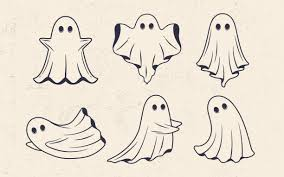

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip
/kaggle/input/ghouls-goblins-and-ghosts-boo/sample_submission.csv.zip
/kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip


## Import Libraries

In [2]:
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
zip_file_path = '/kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip'
output_directory = '/kaggle/working/train_data'

os.makedirs(output_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

In [3]:
zip_file_path = '/kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip'
output_directory = '/kaggle/working/test_data'

os.makedirs(output_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

In [6]:
train=pd.read_csv('/kaggle/working/train_data/train.csv')
test=pd.read_csv('/kaggle/working/test_data/test.csv')

## EDA

In [7]:
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [8]:
test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [9]:
train.shape

(371, 7)

In [10]:
test.shape

(529, 6)

In [11]:
train.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [12]:
test.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64

In [13]:
df=pd.concat([train,test])

In [14]:
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [15]:
df.corr(numeric_only=True)

,id,bone_length,rotting_flesh,hair_length,has_soul
id,1.000000,-0.055528,0.051417,-0.001244,0.026444
bone_length,-0.055528,1.000000,-0.036473,0.391096,0.389710
rotting_flesh,0.051417,-0.036473,1.000000,-0.198511,-0.157359
hair_length,-0.001244,0.391096,-0.198511,1.000000,0.490707
has_soul,0.026444,0.389710,-0.157359,0.490707,1.000000


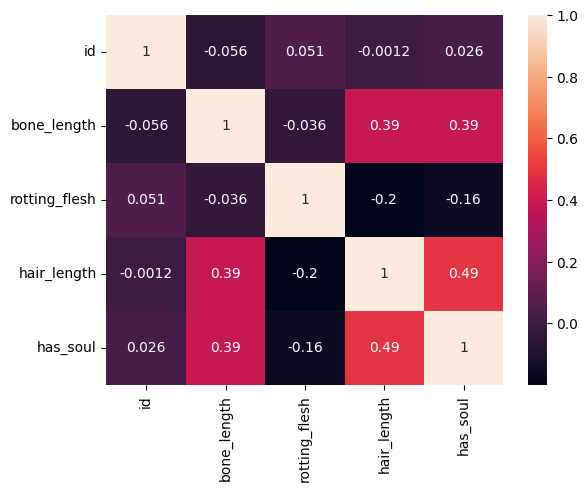

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

## Data Visualization

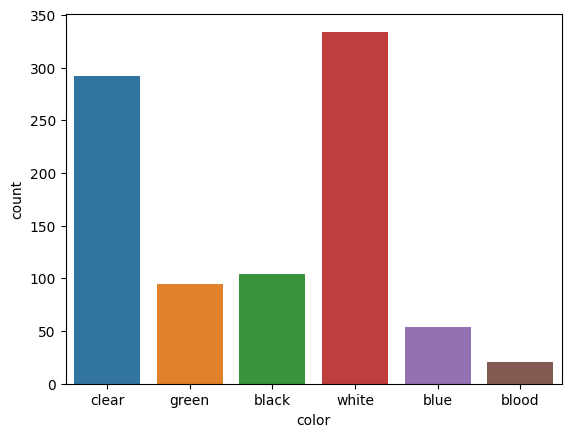

In [17]:
sns.countplot(x=df['color']);

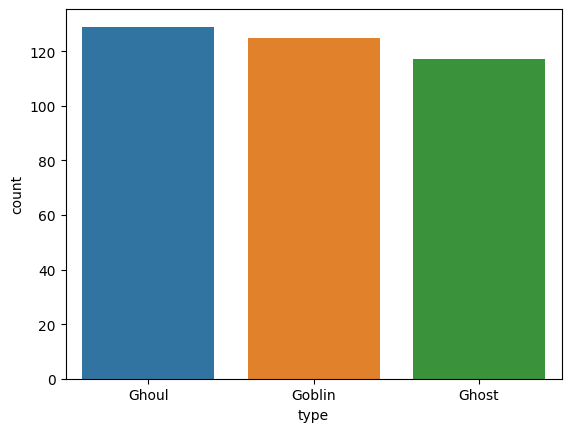

In [18]:
sns.countplot(x=df['type']);

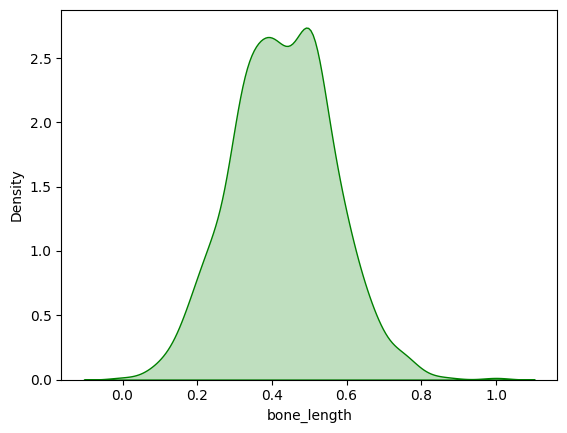

In [60]:
sns.kdeplot(df['bone_length'], fill=True, color='green');

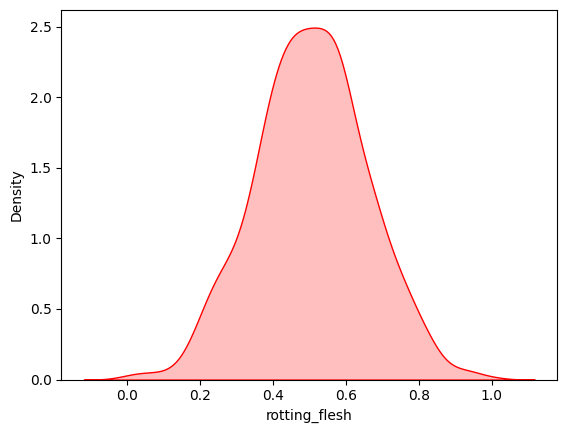

In [61]:
sns.kdeplot(df['rotting_flesh'], fill=True, color='red');

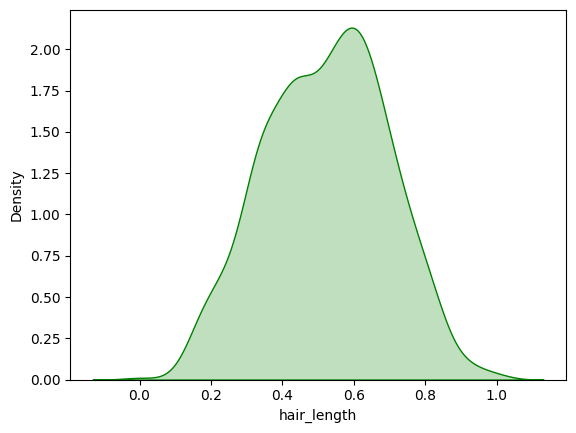

In [62]:
sns.kdeplot(df['hair_length'], fill=True, color='green');

## Modelling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [21]:
train=df[:371]
test=df[371:]

In [23]:
x=train.drop('type', axis=1)
y=train[['type']]

In [24]:
x=pd.get_dummies(x)

In [25]:
x.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0,0.354512,0.350839,0.465761,0.781142,False,False,False,True,False,False
1,1,0.575560,0.425868,0.531401,0.439899,False,False,False,False,True,False
2,2,0.467875,0.354330,0.811616,0.791225,True,False,False,False,False,False
3,4,0.776652,0.508723,0.636766,0.884464,True,False,False,False,False,False
4,5,0.566117,0.875862,0.418594,0.636438,False,False,False,False,True,False


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [27]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
tahmin=rf.predict(x_test)
accuracy_score(tahmin,y_test)

0.6933333333333334

In [28]:
confusion_matrix(tahmin,y_test)

array([[17,  2,  4],
       [ 0, 20,  3],
       [ 7,  7, 15]])

<Axes: >

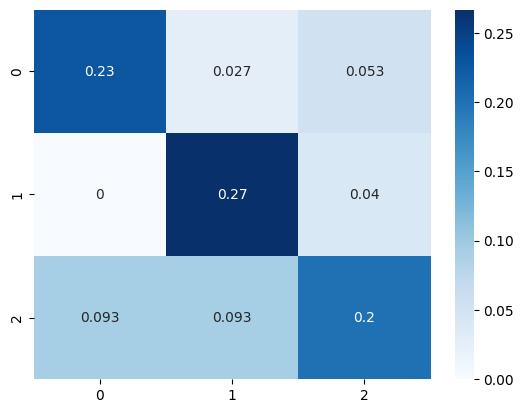

In [29]:
cm = confusion_matrix(tahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues')

In [30]:
print(classification_report(tahmin,y_test))

              precision    recall  f1-score   support

       Ghost       0.71      0.74      0.72        23
       Ghoul       0.69      0.87      0.77        23
      Goblin       0.68      0.52      0.59        29

    accuracy                           0.69        75
   macro avg       0.69      0.71      0.69        75
weighted avg       0.69      0.69      0.69        75



In [31]:
#K-Fold Cross Validation
x=train.drop('type', axis=1)
y=train[['type']]
x=pd.get_dummies(x)

model=RandomForestClassifier()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.70666667 0.68918919 0.67567568 0.72972973 0.75675676]
Mean Accuracy: 0.7116036036036035


In [32]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):

    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    nb = MultinomialNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,  b, nb, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB','MultinomialNB','K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []


    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)

    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1


    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [33]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1-score
Random Forest,0.693333,0.719324,0.693333,0.701197
Logistic Regression,0.680000,0.723148,0.680000,0.690664
Gradient Boosting,0.680000,0.704867,0.680000,0.686524
AdaBoost,0.666667,0.662935,0.666667,0.663696
Decision Tree,0.626667,0.657569,0.626667,0.636717
K-Nearest Neighbors,0.400000,0.394805,0.400000,0.391655
MultinomialNB,0.360000,0.379576,0.360000,0.357003
MLP Classifier,0.360000,0.559577,0.360000,0.300650
SVM,0.320000,0.298891,0.320000,0.276838
BernoulliNB,0.280000,0.172434,0.280000,0.212564


## Test Data Prediction

In [42]:
train=df[:371]
test=df[371:]

In [43]:
x=train.drop('type', axis=1)
y=train[['type']]

In [44]:
x=pd.get_dummies(x)

In [45]:
test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,3,0.471774,0.387937,0.706087,0.698537,black,NaN
1,6,0.427332,0.645024,0.565558,0.451462,white,NaN
2,9,0.549602,0.491931,0.660387,0.449809,black,NaN
3,10,0.638095,0.682867,0.471409,0.356924,white,NaN
4,13,0.361762,0.583997,0.377256,0.276364,black,NaN


In [46]:
test=pd.get_dummies(test)

In [47]:
test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,3,0.471774,0.387937,0.706087,0.698537,True,False,False,False,False,False
1,6,0.427332,0.645024,0.565558,0.451462,False,False,False,False,False,True
2,9,0.549602,0.491931,0.660387,0.449809,True,False,False,False,False,False
3,10,0.638095,0.682867,0.471409,0.356924,False,False,False,False,False,True
4,13,0.361762,0.583997,0.377256,0.276364,True,False,False,False,False,False


In [52]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [55]:
y_pred=rf.predict(test)

In [56]:
y_pred

array(['Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Ghost', 'Ghost', 'Ghoul',
       'Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghost',
       'Ghoul', 'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghoul', 'Ghoul',
       'Ghoul', 'Goblin', 'Goblin', 'Ghoul', 'Goblin', 'Ghoul', 'Goblin',
       'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul', 'Goblin', 'Goblin',
       'Ghoul', 'Ghost', 'Goblin', 'Ghost', 'Ghoul', 'Goblin', 'Ghoul',
       'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul',
       'Ghost', 'Goblin', 'Goblin', 'Ghost', 'Goblin', 'Goblin', 'Ghost',
       'Goblin', 'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Ghoul', 'Ghost',
       'Goblin', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul', 'Ghost', 'Ghoul',
       'Ghost', 'Goblin', 'Goblin', 'Ghoul', 'Goblin', 'Ghoul', 'Goblin',
       'Goblin', 'Ghost', 'Goblin', 'Ghost', 'Goblin', 'Ghoul', 'Ghoul',
       'Ghost', 'Ghost', 'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghost',
       'Ghost', 'Goblin', 'Goblin', 'Ghost', 'Ghost', 'Gobli

In [57]:
predictions1=pd.DataFrame()
predictions1['id']=test['id']
predictions1['type']=y_pred

In [58]:
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 0 to 528
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      529 non-null    int64 
 1   type    529 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.4+ KB


In [59]:
predictions1.to_csv('ghost_submission.csv', index=False)

## Summary

The training and test data sets were examined, missing values ​​were detected and data types were analyzed. Filling in missing data, converting categorical data to numerical data and normalization processes were performed. Initially, the Random Forest algorithm was used and the model was trained on the training data set. In addition, the overall performance of the model was tested with K-Fold cross-validation. The accuracy of the model was evaluated with confusion matrices and classification reports. Predictions were made on the test data set and the results were saved in a CSV file in a suitable format for submission to Kaggle. At the end of all these processes, the classification accuracy of the model was increased and an effective solution was developed for uninvited guests such as ghouls, ghosts and goblins.